# Singal To Noise All Models
 - Calculates the singal to nosie for all models in longrunmip for GMST
 - Fraction of models stable for windows for GMST
 
 PHD-9:
 * read_and_merge_netcdfs moved from longrunmip_loader to open_ds


In [4]:
import xarray as xr
import numpy as np
import pandas as pd
# import matplotlib.pyplot 
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import cftime
from importlib import reload
from dask.diagnostics import ProgressBar
import matplotlib.ticker as mticker
import os, sys
from glob import glob
import constants
sys.path.append(constants.MODULE_DIR)
import json
# Custom plots for signal to noise functions.
import sn_plotting as sn_plot
import open_ds
import xarray_class_accessors as xca
warnings.filterwarnings('ignore')
import open_ds
import signal_to_noise as sn
import xarray_extender as xce

In [5]:
import logging, sys
logging.basicConfig(format="%(message)s", filemode='w', stream=sys.stdout)
logger = logging.getLogger()

In [6]:
# The directory where all of the longrun mip data used in this notebook is stored.
ROOT_DIR = constants.LONGRUNMIP_RETIMED_DIR
ROOT_DIR

'/g/data/w40/ab2313/PhD/longrunmip/regrid_retimestamped'

In [7]:
constants.LONGRUNMIP_RETIMED_DIR

'/g/data/w40/ab2313/PhD/longrunmip/regrid_retimestamped'

In [8]:
IMG_DIR = constants.IMAGE_SAVE_DIR_TOP_LEVEL
IMG_DIR

'/home/563/ab2313/gdata/images/PhD/top_level'

# Loading Data

In [78]:
# fnames_abrupt4x = list(map(os.path.basename, glob(os.path.join(constants.LONGRUNMIP_RETIMED_DIR, '*abrupt4x*'))))
# fnames_abrupt4x
# len(fnames_abrupt4x)
# models_abrupt4x = np.array([fname.split('_')[2] for fname in fnames_abrupt4x])
# models_abrupt4x

['tas_mon_ECHAM5MPIOM_abrupt4x_1001_g025.nc',
 'tas_mon_ECEARTH_abrupt4x_150_g025.nc',
 'tas_ann_HadGEM2_abrupt4x_1299_g025.nc',
 'tas_mon_GISSE2R_abrupt4x_5001_g025.nc',
 'tas_mon_MPIESM12_abrupt4x_999_g025.nc',
 'tas_mon_CNRMCM61_abrupt4x_1850_g025.nc',
 'tas_mon_CCSM3_abrupt4x_2120_g025.nc',
 'tas_mon_MIROC32_abrupt4x_150_g025.nc',
 'tas_ann_MPIESM11_abrupt4x_4459_g025.nc',
 'tas_mon_CESM104_abrupt4x_5900_g025.nc',
 'tas_ann_FAMOUS_abrupt4x_3000_g025.nc',
 'tas_mon_HadCM3L_abrupt4x_1000_g025.nc',
 'tas_mon_IPSLCM5A_abrupt4x_1000_g025.nc',
 'tas_ann_GFDLCM3_abrupt4x_150_g025.nc',
 'tas_ann_GFDLESM2M_abrupt4x_150_g025.nc']

In [10]:
FILE_NAME_DICT = open_ds.get_exeriment_file_names()
FILE_NAME_DICT.keys()

ECHAM5MPIOM, ECEARTH, HadGEM2, MIROC32, GFDLCM3, GFDLESM2M, 
- Fraction of good models 1.0
------
HadGEM2, GFDLCM3, ECHAM5MPIOM, GFDLESM2M, GFDLESM2M, ECEARTH, GFDLCM3, MIROC32, 
- Fraction of good models 1.0
------
ECHAM5MPIOM, GFDLESM2M, MIROC32, GFDLCM3, HadGEM2, ECEARTH, 
- Fraction of good models 1.0
------
GFDLESM2M, ECEARTH, GFDLCM3, MIROC32, HadGEM2, ECHAM5MPIOM, 
- Fraction of good models 1.0
------


dict_keys(['abrupt4x_raw', 'control_raw', 'abrupt4x_loess', 'control_loess'])

In [11]:
FILE_NAME_DICT['abrupt4x_raw']

{'base_path': '/g/data/w40/ab2313/PhD/longrunmip/regrid_retimestamped',
 'file_names': ['tas_mon_GISSE2R_abrupt4x_5001_g025.nc',
  'tas_mon_MPIESM12_abrupt4x_999_g025.nc',
  'tas_mon_CNRMCM61_abrupt4x_1850_g025.nc',
  'tas_mon_CCSM3_abrupt4x_2120_g025.nc',
  'tas_ann_MPIESM11_abrupt4x_4459_g025.nc',
  'tas_mon_CESM104_abrupt4x_5900_g025.nc',
  'tas_ann_FAMOUS_abrupt4x_3000_g025.nc',
  'tas_mon_HadCM3L_abrupt4x_1000_g025.nc',
  'tas_mon_IPSLCM5A_abrupt4x_1000_g025.nc']}

In [12]:
# TO-UPDATE: This can be updated with FILE_NAME_DICT = open_ds.get_exeriment_file_names()
# This should control the getting of all file names in teh future.

abrupt4x_ds = open_ds.read_and_merge_netcdfs(FILE_NAME_DICT['abrupt4x_raw']['file_names'], 
                                             FILE_NAME_DICT['abrupt4x_raw']['base_path'],
                                             verbose=True)
abrupt4x_ds

tas_mon_GISSE2R_abrupt4x_5001_g025.nc
<xarray.DataArray 'gisse2r' (time: 5001, lat: 72, lon: 144)>
[51850368 values with dtype=float32]
Coordinates:
  * time     (time) object 0000-12-31 00:00:00 ... 5000-12-31 00:00:00
  * lat      (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
-----------
tas_mon_MPIESM12_abrupt4x_999_g025.nc
<xarray.DataArray 'mpiesm12' (time: 1000, lat: 72, lon: 144)>
[10368000 values with dtype=float32]
Coordinates:
  * time     (time) object 0000-12-31 00:00:00 ... 0999-12-31 00:00:00
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lat      (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
-----------
tas_mon_CNRMCM61_abrupt4x_1850_g025.nc
<xarray.DataArray 'cnrmcm61' (time: 1850, lat: 72, lon: 144)>
[19180800 values with dtype=float32]
Coordinates:
  * time     (time) object 0000-12-31 00:00:00 ... 1849-12-31 00:00:

<xarray.Dataset>
Dimensions:   (time: 5900, lat: 72, lon: 144)
Coordinates:
  * time      (time) object 0000-12-31 00:00:00 ... 5899-12-31 00:00:00
  * lat       (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon       (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Data variables:
    gisse2r   (time, lat, lon) float32 226.4 226.3 226.3 226.1 ... nan nan nan
    mpiesm12  (time, lat, lon) float32 224.6 224.5 224.5 224.5 ... nan nan nan
    cnrmcm61  (time, lat, lon) float32 225.8 225.8 225.8 225.9 ... nan nan nan
    ccsm3     (time, lat, lon) float32 236.7 236.3 236.3 236.0 ... nan nan nan
    mpiesm11  (time, lat, lon) float32 225.2 225.2 225.3 225.3 ... nan nan nan
    cesm104   (time, lat, lon) float32 ...
    famous    (time, lat, lon) float32 226.6 226.6 226.5 226.4 ... nan nan nan
    hadcm3l   (time, lat, lon) float64 229.2 229.1 229.2 229.2 ... nan nan nan
    ipslcm5a  (time, lat, lon) float32 230.3 230.1 230.0 229.9 ... nan nan nan
Attributes:
    length:   5001

In [83]:
fnames_control = list(map(os.path.basename, glob(os.path.join(ROOT_DIR, '*control*'))))
fnames_control 

['tas_ann_HadGEM2_control_239_g025.nc',
 'tas_mon_HadCM3L_control_1000_g025.nc',
 'tas_mon_GFDLCM3_control_5200_g025.nc',
 'tas_mon_CCSM3_control_1530_g025.nc',
 'tas_mon_GISSE2R_control_5225_g025.nc',
 'tas_ann_MPIESM11_control_2000_g025.nc',
 'tas_mon_IPSLCM5A_control_1000_g025.nc',
 'tas_mon_ECHAM5MPIOM_control_100_g025.nc',
 'tas_mon_GFDLESM2M_control_1340_g025.nc',
 'tas_mon_MPIESM12_control_1237_g025.nc',
 'tas_ann_GFDLESM2M_control_150_g025.nc',
 'tas_ann_FAMOUS_control_3000_g025.nc',
 'tas_mon_CESM104_control_1000_g025.nc',
 'tas_mon_ECEARTH_control_508_g025.nc',
 'tas_ann_GFDLCM3_control_150_g025.nc',
 'tas_mon_MIROC32_control_680_g025.nc',
 'tas_mon_CNRMCM61_control_2000_g025.nc']

In [13]:
control_ds = open_ds.read_and_merge_netcdfs(FILE_NAME_DICT['control_raw']['file_names'], 
                                             FILE_NAME_DICT['control_raw']['base_path'])
control_ds

tas_mon_HadCM3L_control_1000_g025.nc
tas_mon_CCSM3_control_1530_g025.nc
tas_mon_GISSE2R_control_5225_g025.nc
tas_ann_MPIESM11_control_2000_g025.nc
tas_mon_IPSLCM5A_control_1000_g025.nc
 - Dropping coords ['height']
tas_mon_MPIESM12_control_1237_g025.nc
tas_ann_FAMOUS_control_3000_g025.nc
 - Dropping coords ['height']
tas_mon_CESM104_control_1000_g025.nc
tas_mon_CNRMCM61_control_2000_g025.nc
 - Dropping coords ['height']


<xarray.Dataset>
Dimensions:   (time: 5225, lon: 144, lat: 72)
Coordinates:
  * time      (time) object 0000-12-31 00:00:00 ... 5224-12-31 00:00:00
  * lon       (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * lat       (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
Data variables:
    hadcm3l   (time, lat, lon) float64 227.3 227.3 227.5 227.6 ... nan nan nan
    ccsm3     (time, lat, lon) float32 234.3 234.0 234.0 233.6 ... nan nan nan
    gisse2r   (time, lat, lon) float32 ...
    mpiesm11  (time, lat, lon) float32 224.7 224.7 224.6 224.6 ... nan nan nan
    ipslcm5a  (time, lat, lon) float32 227.2 227.1 227.0 226.9 ... nan nan nan
    mpiesm12  (time, lat, lon) float32 224.4 224.4 224.4 224.4 ... nan nan nan
    famous    (time, lat, lon) float32 224.5 224.4 224.4 224.3 ... nan nan nan
    cesm104   (time, lat, lon) float32 227.5 227.4 227.3 227.3 ... nan nan nan
    cnrmcm61  (time, lat, lon) float32 224.1 224.1 224.1 224.2 ... nan nan nan
Attributes:
    length:   1000

In [20]:
with open('data/longrunmip_model_lengths.json') as f:
    longrunmip_model_lengths = json.loads(f.read())

In [21]:
good_model_list = list(longrunmip_model_lengths['good_models'])
good_model_list

['ccsm3',
 'cesm104',
 'cnrmcm61',
 'famous',
 'gisse2r',
 'hadcm3l',
 'ipslcm5a',
 'mpiesm11',
 'mpiesm12']

In [22]:
abrupt4x_ds = abrupt4x_ds[good_model_list]
control_ds = control_ds[good_model_list]

In [23]:
models = list(abrupt4x_ds.data_vars)
models

['ccsm3',
 'cesm104',
 'cnrmcm61',
 'famous',
 'gisse2r',
 'hadcm3l',
 'ipslcm5a',
 'mpiesm11',
 'mpiesm12']

# Calculations

In [25]:
# UPDATE-FROM #xr.merge([control_ds[model].clima.space_mean() for model in models])
control_ds_mean = control_ds.clima_ds.space_mean()
control_ds_mean

<xarray.Dataset>
Dimensions:   (time: 5225)
Coordinates:
  * time      (time) object 0000-12-31 00:00:00 ... 5224-12-31 00:00:00
Data variables:
    ccsm3     (time) float64 287.3 287.2 286.9 286.7 286.6 ... nan nan nan nan
    cesm104   (time) float64 286.7 286.6 286.6 286.8 286.9 ... nan nan nan nan
    cnrmcm61  (time) float64 286.2 286.1 286.1 286.0 286.0 ... nan nan nan nan
    famous    (time) float64 287.6 287.5 287.5 287.6 287.7 ... nan nan nan nan
    gisse2r   (time) float64 287.6 287.5 287.5 287.6 ... 287.4 287.5 287.5 287.5
    hadcm3l   (time) float64 287.6 287.4 287.2 287.2 287.5 ... nan nan nan nan
    ipslcm5a  (time) float64 285.1 285.1 285.2 285.4 285.2 ... nan nan nan nan
    mpiesm11  (time) float64 286.6 286.6 286.8 286.9 286.7 ... nan nan nan nan
    mpiesm12  (time) float64 287.1 287.0 287.0 287.1 286.9 ... nan nan nan nan

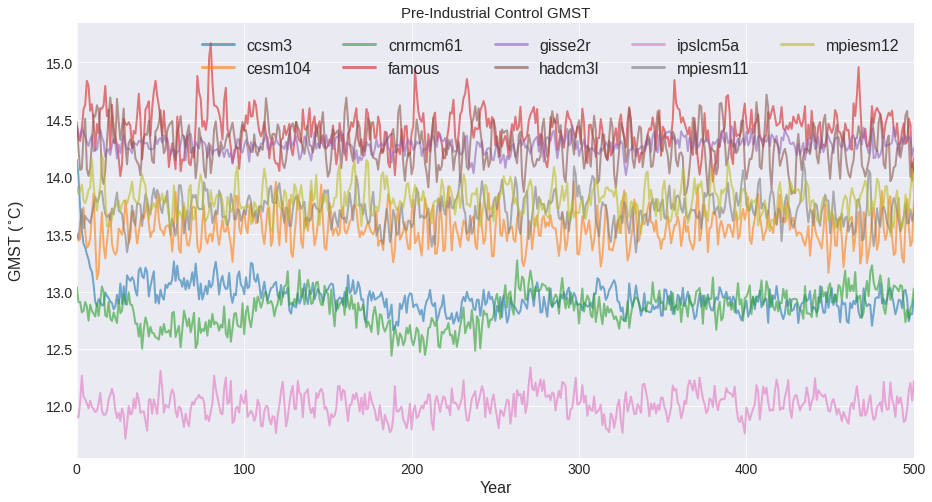

In [55]:

plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(15,8))

time = control_ds_mean['time'].values
years = [t.year for t in time]
for var in list(control_ds_mean.data_vars):

    plot_kwargs = dict(alpha = 0.6,linewidth = 2)
        
    ax.plot(years, control_ds_mean[var].values - 273.15, label=var, **plot_kwargs)
    
ax.set_ylabel(r'GMST ($^{\circ}$C)', size=16, labelpad=20)
ax.set_xlabel('Year', size=16)
ax.set_xlim(years[0], years[500])
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
leg = ax.legend(ncol = 5, fontsize=16)
[line.set_linewidth(3) for line in leg.get_lines()];
ax.set_title('Pre-Industrial Control GMST', fontsize=15);

fig.savefig(os.path.join(IMG_DIR, '04_multi_model_control_good_models_t500_year_axis.png'), bbox_inches='tight')

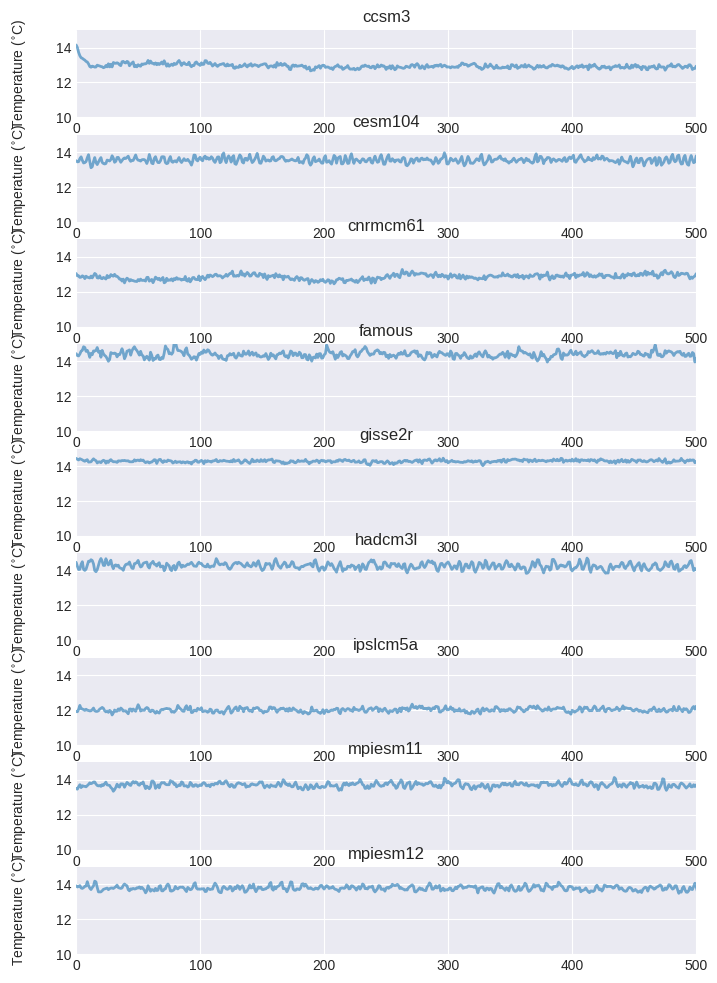

In [296]:

plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(8,12))

time = control_ds_mean['time'].values
years = [t.year for t in time]
dvars = list(control_ds_mean.data_vars)
for i,var in enumerate(dvars):
    
    ax = fig.add_subplot(len(dvars), 1, i + 1)

    ax.plot(years, control_ds_mean[var].values - 273.15, label=var, alpha = 0.6,linewidth = 2)
    ax.set_xlim(years[0], years[500])
    ax.set_ylim([10, 15])
    ax.set_title(var)

    ax.set_ylabel(r'Temperature ($^{\circ}$C)', labelpad=20)

fig.savefig(os.path.join(IMG_DIR, '04_multi_model_control_good_models_t500_year_axis_split_model.png'), bbox_inches='tight')

In [37]:
abrupt4x_anom = abrupt4x_ds.clima_ds.anomalies(control_ds)

ccsm3, Using historical dataset
cesm104, Using historical dataset
cnrmcm61, Using historical dataset
famous, Using historical dataset
gisse2r, Using historical dataset
hadcm3l, Using historical dataset
ipslcm5a, Using historical dataset
mpiesm11, Using historical dataset
mpiesm12, Using historical dataset


In [39]:
abrupt4x_anom

<xarray.Dataset>
Dimensions:   (time: 5900, lat: 72, lon: 144)
Coordinates:
  * time      (time) object 0000-12-31 00:00:00 ... 5899-12-31 00:00:00
  * lat       (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon       (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Data variables:
    ccsm3     (time, lat, lon) float32 dask.array<chunksize=(8, 72, 144), meta=np.ndarray>
    cesm104   (time, lat, lon) float32 dask.array<chunksize=(8, 72, 144), meta=np.ndarray>
    cnrmcm61  (time, lat, lon) float32 dask.array<chunksize=(8, 72, 144), meta=np.ndarray>
    famous    (time, lat, lon) float32 dask.array<chunksize=(8, 72, 144), meta=np.ndarray>
    gisse2r   (time, lat, lon) float32 dask.array<chunksize=(8, 72, 144), meta=np.ndarray>
    hadcm3l   (time, lat, lon) float64 dask.array<chunksize=(8, 72, 144), meta=np.ndarray>
    ipslcm5a  (time, lat, lon) float32 dask.array<chunksize=(8, 72, 144), meta=np.ndarray>
    mpiesm11  (time, lat, lon) float32 dask.array<chunksize=(8, 72, 144), meta=np.ndarray>
    mpiesm12  (time, lat, lon) float32 dask.array<chunksize=(8, 72, 144), meta=np.ndarray>

In [43]:
abrupt4x_mean = abrupt4x_anom.clima_ds.space_mean()
abrupt4x_mean = abrupt4x_mean.compute()

In [109]:
# The mean of the models. As the models are each a data vars, going to array then getting 
# mean works
# abrupt4x_mean['mean'] = abrupt4x_mean.to_array(dim='models').mean('models')

# control_ds_mean['mean'] = control_ds_mean.to_array(dim='models').mean('models')

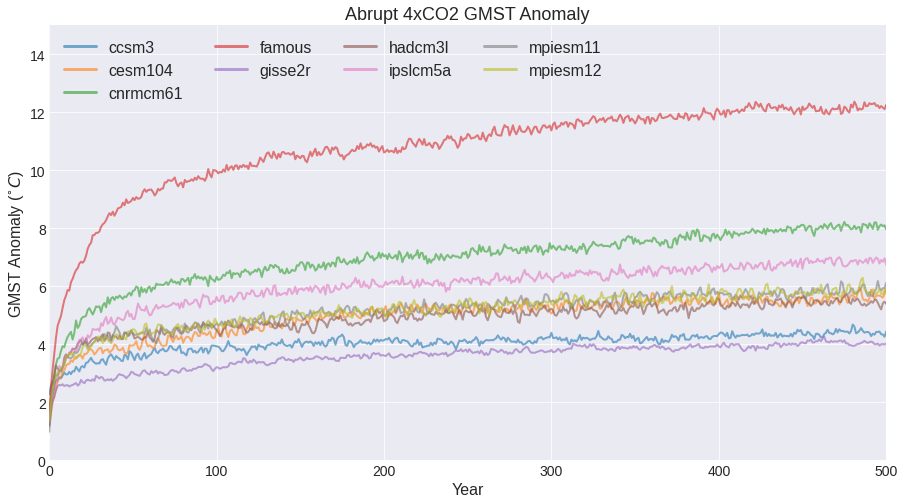

In [52]:
plt.style.use('seaborn-darkgrid')

data = abrupt4x_mean.where(abrupt4x_mean.time.dt.year < 13500, drop = True)

fig, ax = plt.subplots(figsize=(15,8))


# time = data['time'].values
for var in list(data.data_vars):
    
    # Removing nans from data
    da = data[var].dropna(dim='time')
    time = da.time.values
    years = [t.year for t in time]

    values = da.values
    
    line_kwargs = dict(alpha = 0.6,linewidth = 2)
    
    ax.plot(years, values, label=var, **line_kwargs)
    c = plt.gca().lines[-1].get_color()
#     ax.annotate(var, xy = (time[-1], values[-1]), color=c, zorder=1000, size=12)

ax.set_ylabel(r'GMST Anomaly ($^{\circ}C$)', size=16);
ax.set_xlabel('Year', size=16);
ax.set_title('Abrupt 4xCO2 GMST Anomaly', fontsize=18);
ax.set_ylim([0,15]);
ax.set_xlim(years[0], years[500])
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
leg = ax.legend(ncol=4, fontsize = 16);
[line.set_linewidth(3) for line in leg.get_lines()];
fig.savefig(os.path.join(IMG_DIR, '04_good_models_mean_t500_year_axis.png'))

In [112]:
# Creating a dictionary that contains the metadata on different models
model_metadata = {}
for model in list(abrupt4x_mean.data_vars):
    time_length = len(abrupt4x_mean[model].dropna(dim='time').time.values)
    model_metadata[model] = {'length (years)': time_length}

In [113]:
model_metadata

{'ccsm3': {'length (years)': 2120},
 'cesm104': {'length (years)': 5900},
 'cnrmcm61': {'length (years)': 1850},
 'ecearth': {'length (years)': 150},
 'echam5mpiom': {'length (years)': 1001},
 'famous': {'length (years)': 3000},
 'gfdlcm3': {'length (years)': 150},
 'gfdlesm2m': {'length (years)': 150},
 'gisse2r': {'length (years)': 5001},
 'hadcm3l': {'length (years)': 1000},
 'hadgem2': {'length (years)': 1299},
 'ipslcm5a': {'length (years)': 1000},
 'miroc32': {'length (years)': 150},
 'mpiesm11': {'length (years)': 4459},
 'mpiesm12': {'length (years)': 1000},
 'mean': {'length (years)': 5900}}

In [114]:
reload(sn)

<module 'signal_to_noise' from '/home/563/ab2313/Documents/PhD/modules/signal_to_noise.py'>

In [115]:
end_window = 370

In [116]:
control_sn = control_ds_mean[model].dropna(dim='time')
control_sn

<xarray.DataArray 'mean' (time: 5225)>
array([286.71910727, 286.63848573, 286.63680039, ..., 287.50173469,
       287.47461128, 287.54386128])
Coordinates:
  * time     (time) object 0000-12-31 00:00:00 ... 5224-12-31 00:00:00

In [117]:
import xarray_extender as xe

In [118]:
control_sn.to_dataset()

<xarray.Dataset>
Dimensions:  (time: 5225)
Coordinates:
  * time     (time) object 0000-12-31 00:00:00 ... 5224-12-31 00:00:00
Data variables:
    mean     (time) float64 286.7 286.6 286.6 286.6 ... 287.4 287.5 287.5 287.5

In [119]:
control_sn.to_dataset().reduce(np.nanpercentile,dim='time', q=99)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    mean     float64 287.9

In [120]:
reload(sn)

<module 'signal_to_noise' from '/home/563/ab2313/Documents/PhD/modules/signal_to_noise.py'>

In [133]:
%%time
reload(sn)
# Looping througn and appling the 'sn_multi_window' function to each of the availale models
# TODO: echam5mpiom seems to have a value error occuring at a window length of 101. Need to 
# explore why this occuringn 

stable_sn_dict = {}
unstable_sn_dict = {}

for model in list(abrupt4x_mean.data_vars):
    if model != 'mean': # and model == 'echam5mpiom':
        print(f'\n{model}')
        
        # The try statement is included as echam5mpiom is returning a value error for 
        # 101
        try:
            unstable_sn_da , stable_sn_da  = sn.sn_multi_window(
                                    abrupt4x_mean[model].dropna(dim='time'), 
                                    control_ds_mean[model].dropna(dim='time'), 
                                    end_window=end_window, step_window=2)
            
            # Storing the values as a dictionary and not concating for now.
            stable_sn_dict[model] = stable_sn_da
            unstable_sn_dict[model] = unstable_sn_da
        
        # If there is a value error, document this and move on.
        except ValueError as e:
            print(f'{model} value error')
        


ccsm3
Starting window loop from 21 to 370 with step size of 2
21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207, 209, 211, 213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233, 235, 237, 239, 241, 243, 245, 247, 249, 251, 253, 255, 257, 259, 261, 263, 265, 267, 269, 271, 273, 275, 277, 279, 281, 283, 285, 287, 289, 291, 293, 295, 297, 299, 301, 303, 305, 307, 309, 311, 313, 315, 317, 319, 321, 323, 325, 327, 329, 331, 333, 335, 337, 339, 341, 343, 345, 347, 349, 351, 353, 355, 357, 359, 361, 363, 365, 367, 369, 
cesm104
Starting window loop from 21 to 370 with step size of 2
21, 23, 25, 27, 29, 31, 33, 35, 37, 3

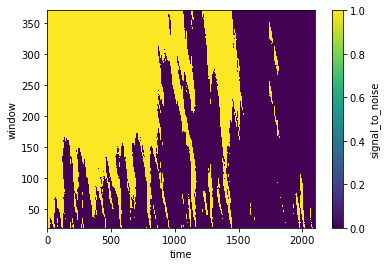

In [152]:
stable_sn_dict[list(stable_sn_dict.keys())[0]]['signal_to_noise'].plot()

In [158]:
stable_sn_dict_da = {key: value['signal_to_noise'] for key, value in stable_sn_dict.items()}
unstable_sn_dict_da = {key: value['signal_to_noise'] for key, value in unstable_sn_dict.items()}

In [159]:
stable_sn_ds = xce.xr_dict_to_xr_dataset(stable_sn_dict_da)
unstable_sn_ds = xce.xr_dict_to_xr_dataset(unstable_sn_dict_da)
unstable_sn_ds

<xarray.Dataset>
Dimensions:   (time: 5880, window: 175)
Coordinates:
  * time      (time) int64 0 1 2 3 4 5 6 ... 5873 5874 5875 5876 5877 5878 5879
  * window    (window) int64 21 23 25 27 29 31 33 ... 359 361 363 365 367 369
Data variables:
    ccsm3     (window, time) float64 6.018 7.895 8.152 7.942 ... nan nan nan nan
    cesm104   (window, time) float64 3.811 3.986 4.19 4.402 ... nan nan nan nan
    cnrmcm61  (window, time) float64 nan 5.074 5.872 6.675 ... nan nan nan nan
    famous    (window, time) float64 5.213 5.901 6.753 7.91 ... nan nan nan nan
    gisse2r   (window, time) float64 2.805 3.156 3.352 3.705 ... nan nan nan nan
    hadcm3l   (window, time) float64 4.071 4.39 4.717 4.92 ... nan nan nan nan
    ipslcm5a  (window, time) float64 4.714 5.076 5.43 6.102 ... nan nan nan nan
    mpiesm11  (window, time) float64 4.002 4.542 5.297 5.843 ... nan nan nan nan
    mpiesm12  (window, time) float64 4.012 4.669 5.41 5.787 ... nan nan nan nan

In [160]:
stable_sn_dict.keys()

dict_keys(['ccsm3', 'cesm104', 'cnrmcm61', 'famous', 'gisse2r', 'hadcm3l', 'ipslcm5a', 'mpiesm11', 'mpiesm12'])

In [312]:
xlims = (0,500)

In [313]:
len(unstable_sn_dict)

9

ccsm3
{'height': 15, 'width': 7, 'hspace': 0.3, 'vmin': -8, 'vmax': 8, 'step': 1, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x7f504fe26760>, 'line_color': 'limegreen', 'line_alpha': 0.5, 'cbar_label': 'S/N', 'cbartick_offset': 0, 'title': 'ccsm3', 'label_size': 12, 'extend': 'both', 'xlowerlim': None, 'xupperlim': None, 'filter_max': False, 'levels': array([-8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8]), 'cbar_xticklabels': array([-8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8]), 'cbar_ticks': array([-8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8])}


['tas']
0 Saving /home/563/ab2313/gdata/images/PhD/top_level/04_individual_models_ccsm3_SN_multi_window_x_lims_no_lim.png
cesm104
{'height': 15, 'width': 7, 'hspace': 0.3, 'vmin': -8, 'vmax': 8, 'step': 1, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x7f504fe26760>, 'line_color': 'limegreen', 'line_alpha': 0.5, 'cbar_label': 'S/N', 'cbartick_

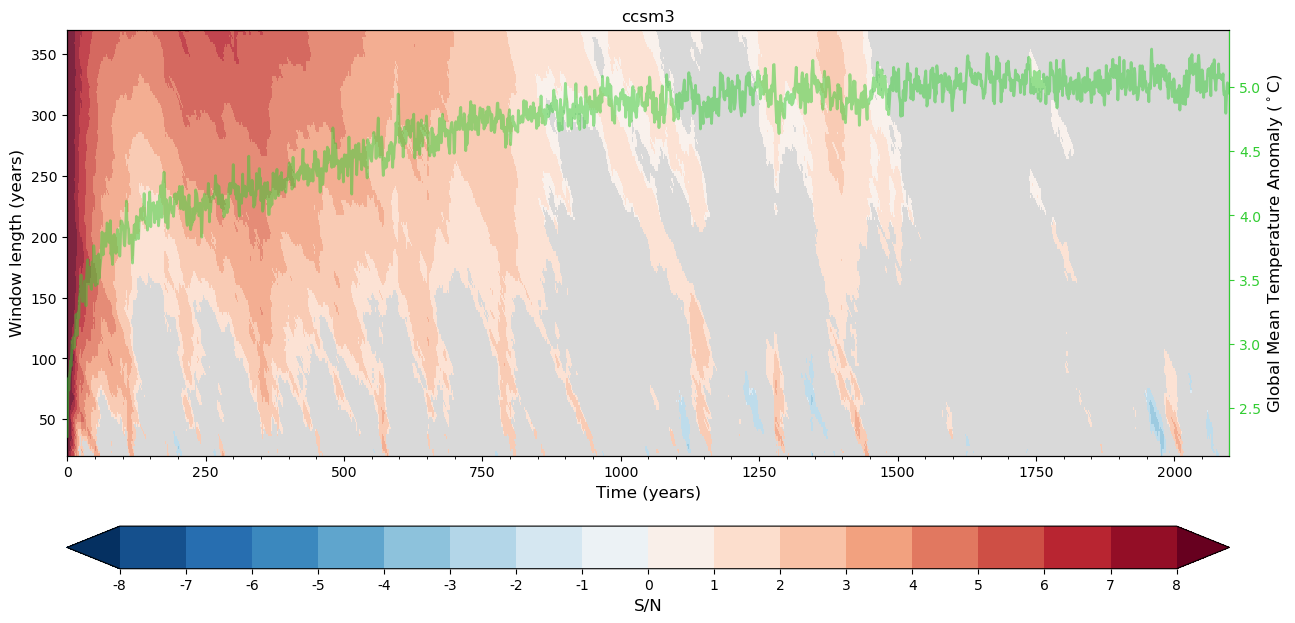

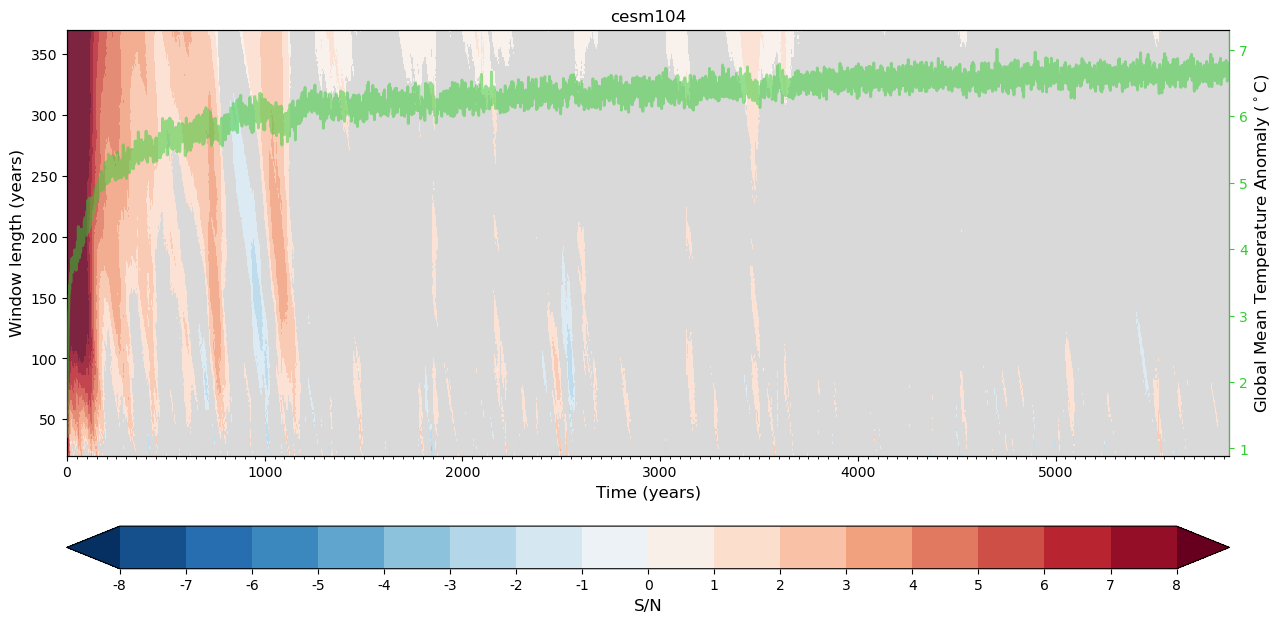

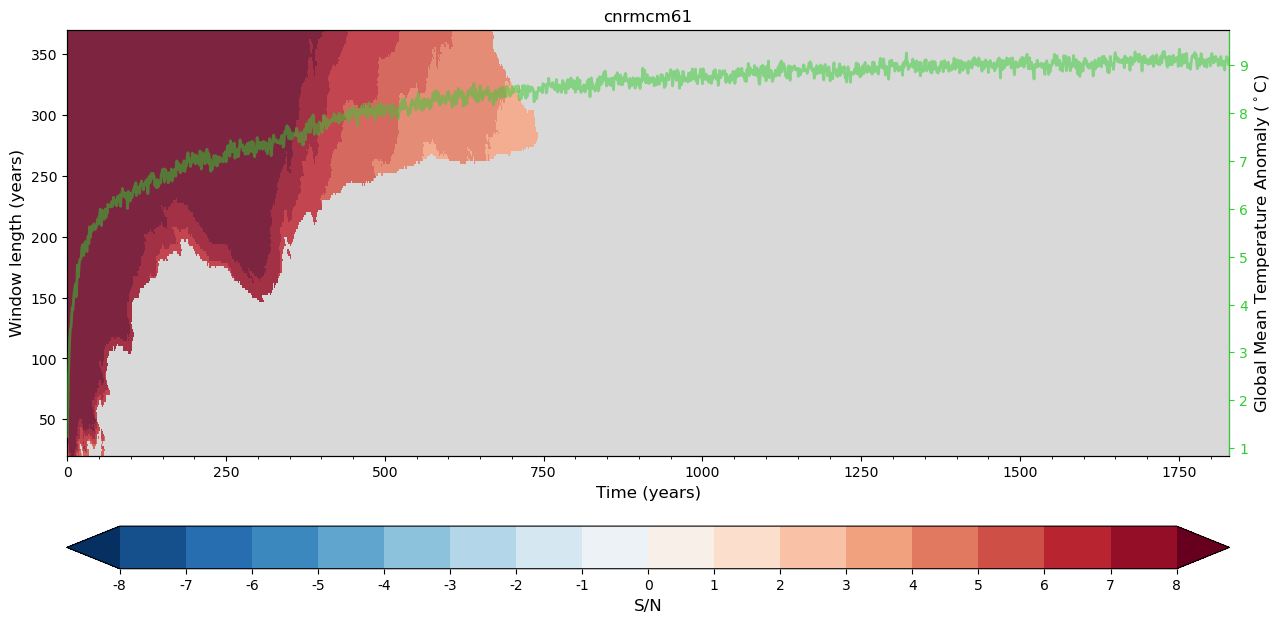

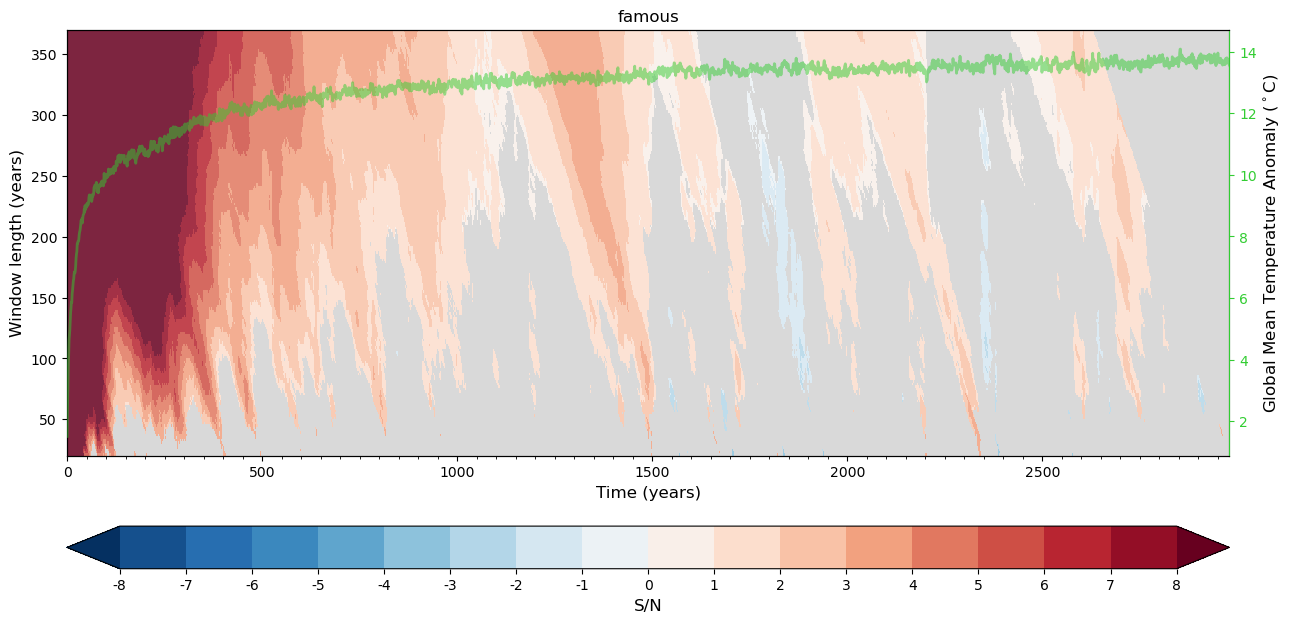

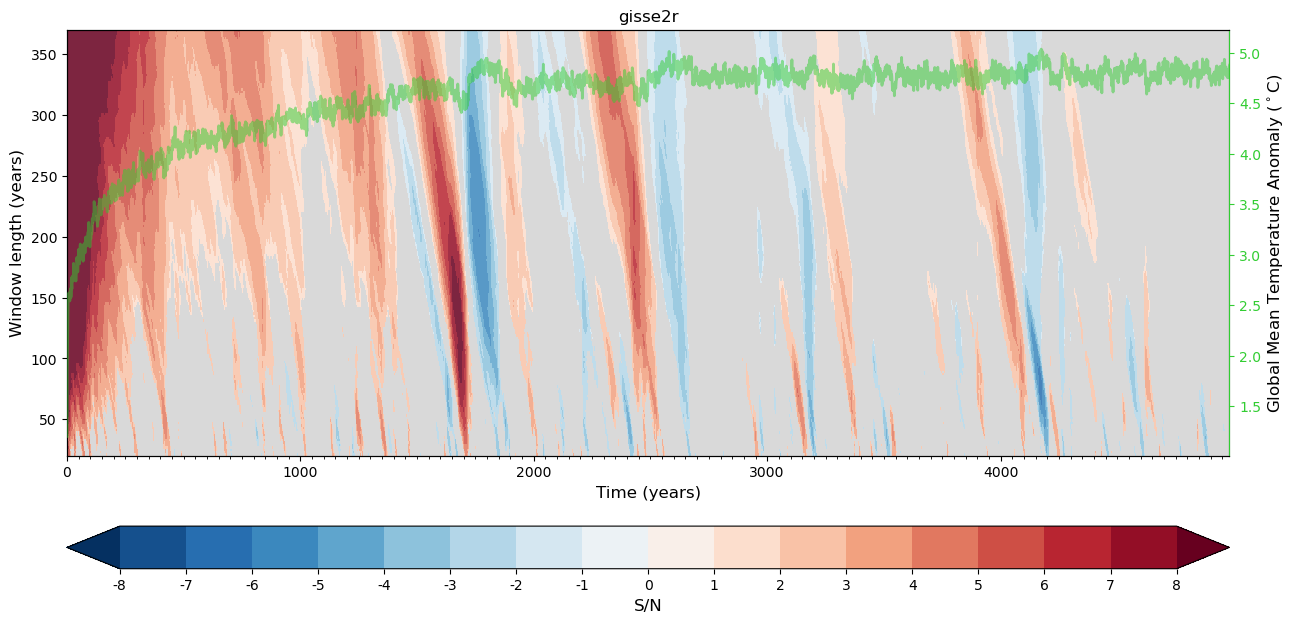

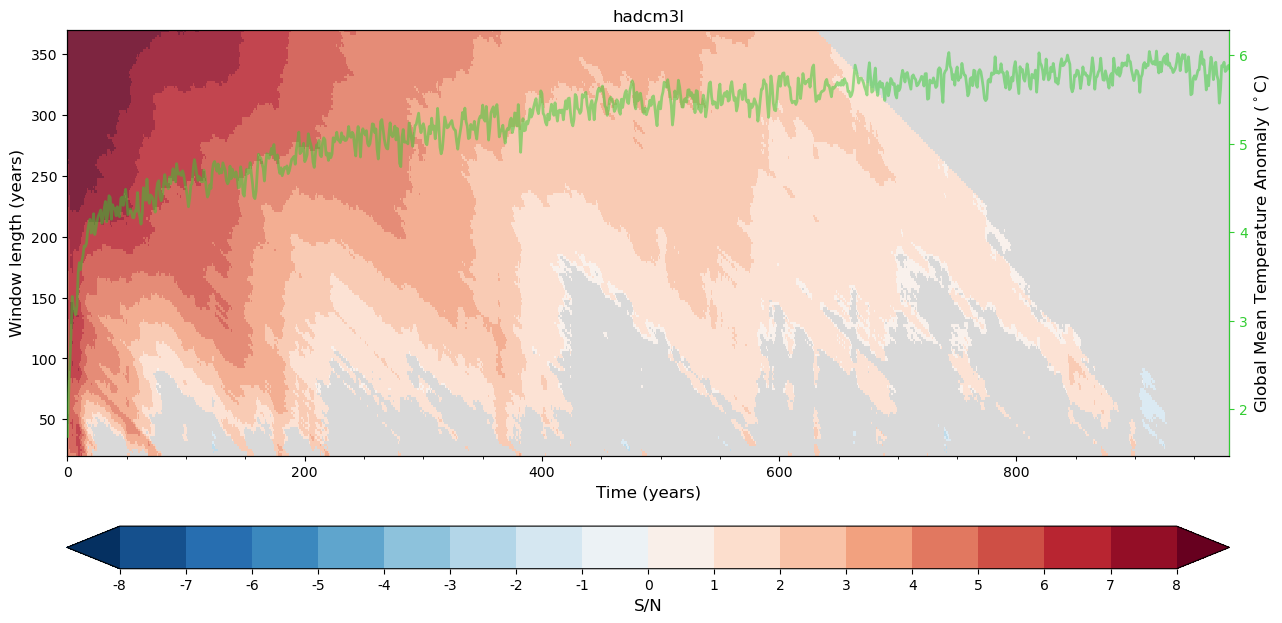

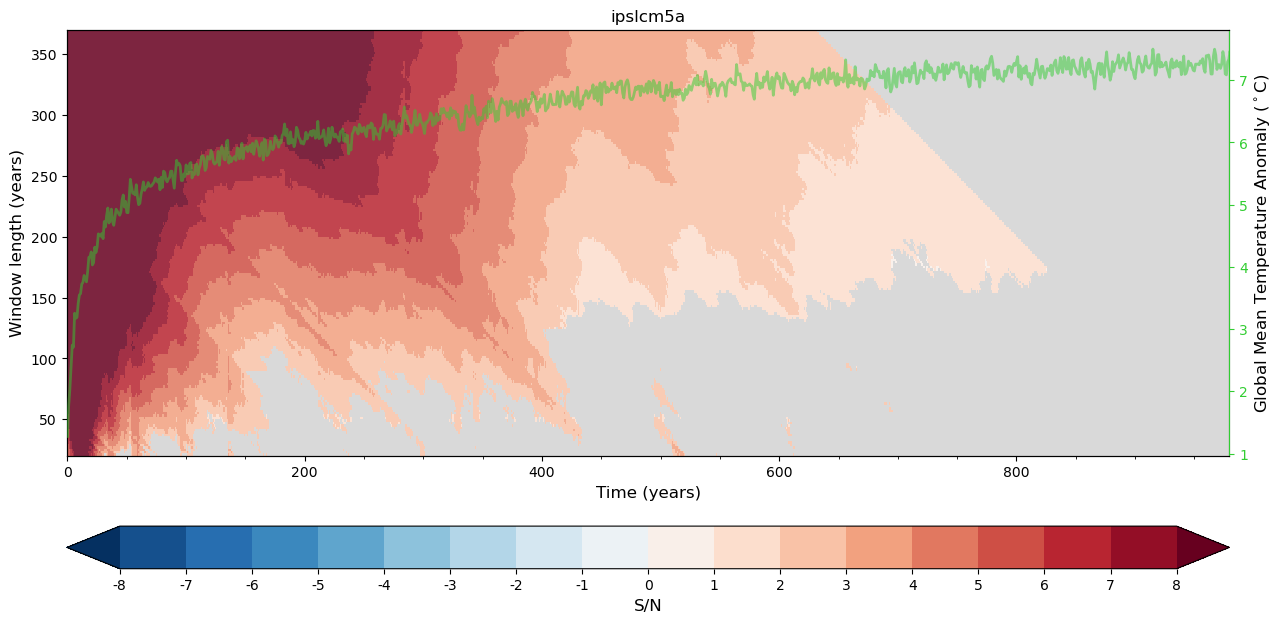

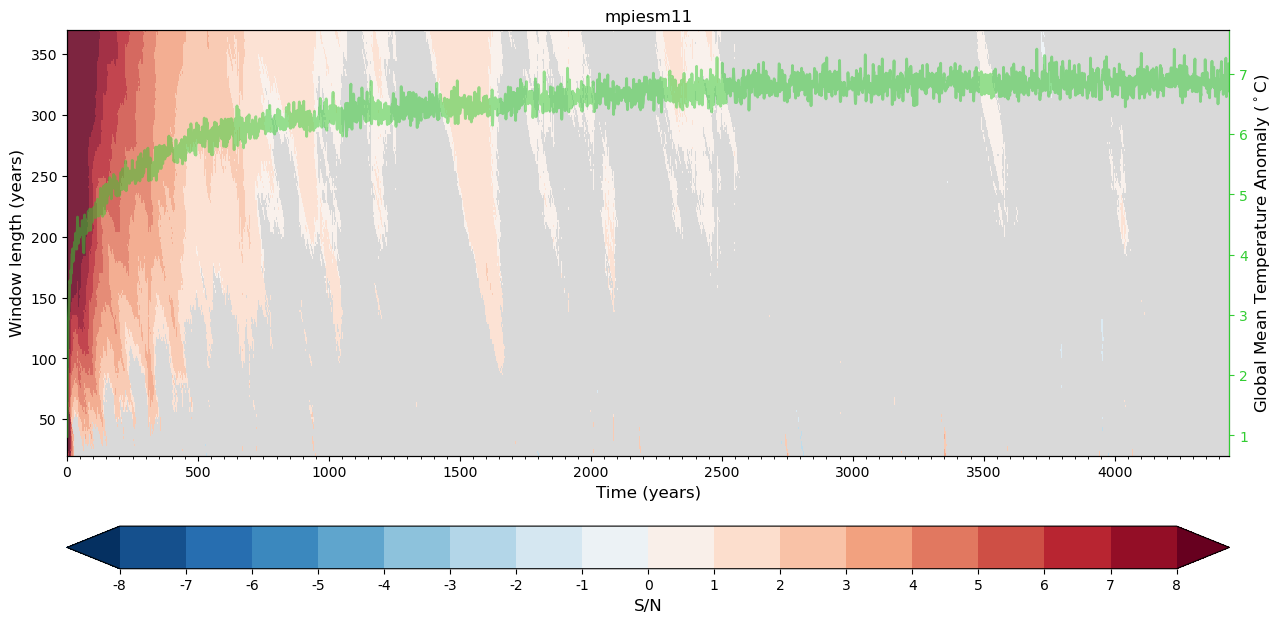

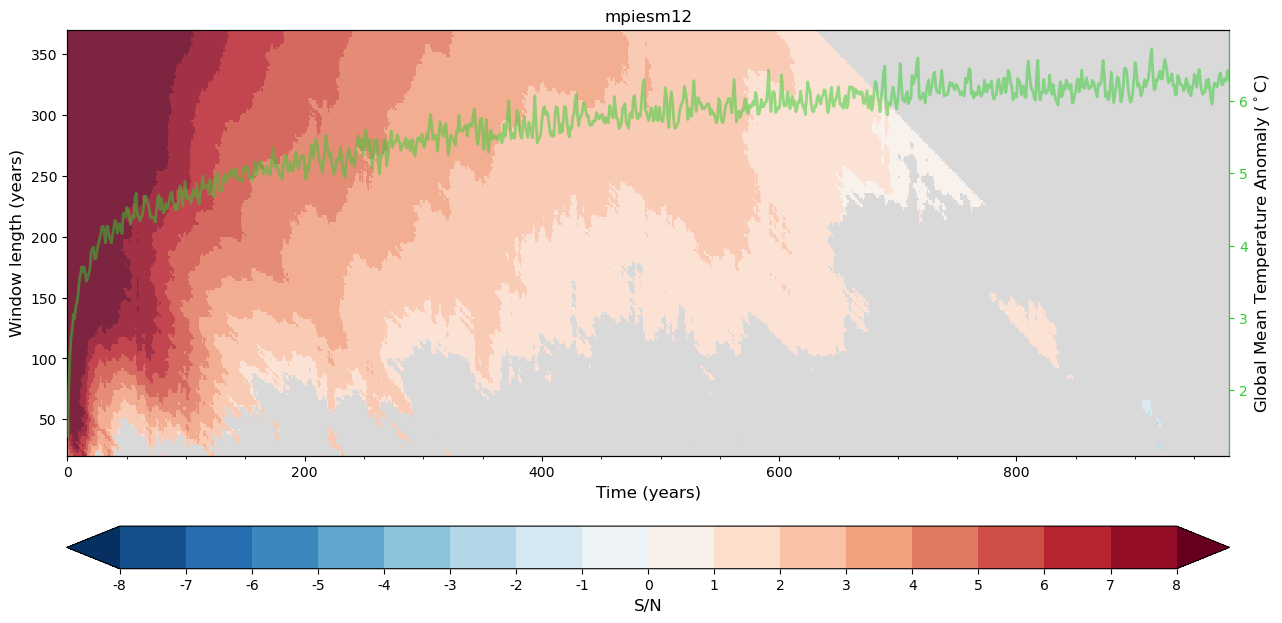

In [319]:
reload(sn_plot)
# Looping through all the models in our resultant dicionary and printing the result. 
for model in unstable_sn_dict:
    print(model)
    (fig, ax1, ax2, ax3, cbar) = sn_plot.sn_multi_window_in_time(unstable_sn_dict[model]['signal_to_noise'], 
                            stable_sn_dict[model]['signal_to_noise'],
                            abrupt4x_mean[model].dropna(dim='time'), title=model, step=1);
#     xlims = list(ax.get_xlim())
#     xlims[1] = xlims[1] - end_window
#     ax1.set_xlim(xlims)
    xlims = 'no_lim'
    save_name = f'{IMG_DIR}/04_individual_models_{model}_SN_multi_window_x_lims_{xlims}.png'
    print(f'Saving {save_name}')
    fig.savefig(save_name, dpi=400, bbox_inches='tight')

### Fraction of Models Stable

In [125]:
unstable_sn_ds

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*

In [171]:
# # As seen in the figures above, hadgem2 does not work for longer window - probably a probelm with control.
# constants.MODELS_TO_DROP
# unstable_sn_ds = unstable_sn_ds.drop(constants.MODELS_TO_DROP, errors='ignore')
# stable_sn_ds = stable_sn_ds.drop(constants.MODELS_TO_DROP, errors='ignore')
# abrupt4x_mean = abrupt4x_mean.drop(constants.MODELS_TO_DROP, errors='ignore')

In [172]:
print(sn.count_over_data_vars.__doc__)


    Counts the number of data vars that are present. 
    
    Parameters
    ----------
    ds (xr.Dataset): the dataset to count over
    data_vars (list): the data vars that need to be coutned.
    dim (str): the dimenesion to be counted over
    
    Returns
    -------
    number_da (xr.Dataarray): the number of occurences accross the data vars
    
    


In [173]:
sn.count_over_data_vars

<function signal_to_noise.count_over_data_vars(ds: xarray.core.dataset.Dataset, data_vars: list = None, dim='model') -> xarray.core.dataarray.DataArray>

In [174]:
print(sn.count_over_data_vars.__doc__)


    Counts the number of data vars that are present. 
    
    Parameters
    ----------
    ds (xr.Dataset): the dataset to count over
    data_vars (list): the data vars that need to be coutned.
    dim (str): the dimenesion to be counted over
    
    Returns
    -------
    number_da (xr.Dataarray): the number of occurences accross the data vars
    
    


In [175]:
abrupt4x_mean

<xarray.Dataset>
Dimensions:    (time: 5900)
Coordinates:
  * time       (time) object 0000-12-31 00:00:00 ... 5899-12-31 00:00:00
Data variables: (12/14)
    ccsm3      (time) float64 2.277 2.562 2.729 2.639 2.747 ... nan nan nan nan
    cesm104    (time) float64 1.181 1.599 1.98 2.198 ... 6.841 6.631 6.753 6.895
    cnrmcm61   (time) float64 1.242 1.925 2.524 2.966 3.297 ... nan nan nan nan
    ecearth    (time) float64 1.031 1.798 2.162 2.563 2.733 ... nan nan nan nan
    famous     (time) float64 1.508 2.445 3.113 3.674 4.199 ... nan nan nan nan
    gfdlcm3    (time) float64 -0.1182 0.61 0.9302 1.302 ... nan nan nan nan
    ...         ...
    hadcm3l    (time) float64 1.69 2.179 2.517 2.854 3.273 ... nan nan nan nan
    ipslcm5a   (time) float64 1.275 1.774 2.037 2.391 2.741 ... nan nan nan nan
    miroc32    (time) float64 0.899 1.735 2.173 2.556 2.763 ... nan nan nan nan
    mpiesm11   (time) float64 0.984 1.628 2.228 2.489 2.941 ... nan nan nan nan
    mpiesm12   (time) float64 1.361 1.988 2.466 2.726 2.842 ... nan nan nan nan
    mean       (time) float64 1.148 1.819 2.223 2.496 ... 6.631 6.753 6.895

In [176]:
# Counting the number of models present at each time step.
reload(sn)
number_models_present = sn.count_over_data_vars(abrupt4x_mean, list(unstable_sn_ds.data_vars), dim='model')

In [177]:
print(sn.percent_finite.__doc__)


    Gets the percent of points that are finite based upon the number of available models.
    The function gets all points that are finite across the dim 'dim'.
    
    Paramaters
    ----------
    da: xr.Dataset or xr.DataArray (ds will be converted to da). This is the dataset 
        that the number of finite points across dim.
    number_present: xr.DataArray - the max number of available observations at each timestep
    dim: str - the dimension to sum finite points across
    
    Returns
    ------
    da: xr.DataArray - the fraction of finite points.
    
    


In [178]:
reload(sn)
# The number of models stable at each timestep
unstable_number_da = sn.number_finite(unstable_sn_ds)
stable_number_da = sn.number_finite(stable_sn_ds)
unstable_number_da

<xarray.DataArray (window: 175, time: 5880)>
array([[8, 9, 9, ..., 0, 0, 0],
       [8, 9, 9, ..., 0, 0, 0],
       [8, 9, 9, ..., 0, 0, 0],
       ...,
       [9, 9, 9, ..., 0, 0, 0],
       [9, 9, 9, ..., 0, 0, 0],
       [9, 9, 9, ..., 0, 0, 0]])
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 ... 5873 5874 5875 5876 5877 5878 5879
  * window   (window) int64 21 23 25 27 29 31 33 ... 357 359 361 363 365 367 369

In [179]:
# Gettting the percent of models that are stable at each point
reload(sn)
unstable_percent_da = sn.percent_finite(unstable_sn_ds, number_models_present)
stable_percent_da = sn.percent_finite(stable_sn_ds, number_models_present)
unstable_percent_da

<xarray.DataArray 'percent_of_model' (window: 175, time: 5880)>
array([[ 88.88888889, 100.        , 100.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 88.88888889, 100.        , 100.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 88.88888889, 100.        , 100.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [100.        , 100.        , 100.        , ...,   0.        ,
          0.        ,   0.        ],
       [100.        , 100.        , 100.        , ...,   0.        ,
          0.        ,   0.        ],
       [100.        , 100.        , 100.        , ...,   0.        ,
          0.        ,   0.        ]])
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 ... 5873 5874 5875 5876 5877 5878 5879
  * window   (window) int64 21 23 25 27 29 31 33 ... 357 359 361 363 365 367 369

In [180]:
print(sn_plot.sn_multi_window_in_time.__doc__)


    Plot with window on LHS and temperature anomlay on RHS
    
    Parameters
    ----------
    unstable_sn_multi_window_da: xr.DataArray - 2D array of dims time and window
    stable_sn_multi_window_da: xr.DataArray - 2D array of dims time and window
    abrupt_anom_smean: xr.DataArray - 1D array with time dimension
    
    
    
    Returns
    --------
    fig, ax1, ax2, ax3, cbar
    
    Default values
    --------------
    height = 15, width = 7, hspace=0.3, vmin = -8, vmax = 8, step = 2, 
    cmap = 'RdBu_r', line_color = 'limegreen', line_alpha = 0.5, 
    cbar_label = 'S/N', cbartick_offset = 0, title='', label_size = 12, extend='both', 
    xlowerlim = None, xupperlim = None
    


In [300]:
end_window

370

In [302]:
sn_length = 500

In [304]:
xupperlim = sn_length + end_window
xupperlim

870

{'height': 15, 'width': 12, 'hspace': 0.3, 'vmin': 0, 'vmax': 10, 'step': 1, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x7f504fb244f0>, 'line_color': 'limegreen', 'line_alpha': 0.5, 'cbar_label': 'Number of Unstable Models', 'cbartick_offset': 0.5, 'title': 'All Models', 'label_size': 12, 'extend': 'neither', 'xlowerlim': None, 'xupperlim': 500, 'hieght': 15, 'cbar_ncols': 5, 'filter_max': True, 'levels': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'cbar_xticklabels': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'cbar_ticks': array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5])}


locator: <matplotlib.ticker.FixedLocator object at 0x7f5061e1aeb0>
cbar x-tick labels = [0 1 2 3 4 5 6 7 8 9]
['ccsm3', 'cesm104', 'cnrmcm61', 'famous', 'gisse2r', 'hadcm3l', 'ipslcm5a', 'mpiesm11', 'mpiesm12']
0 1 2 3 4 5 6 7 8 

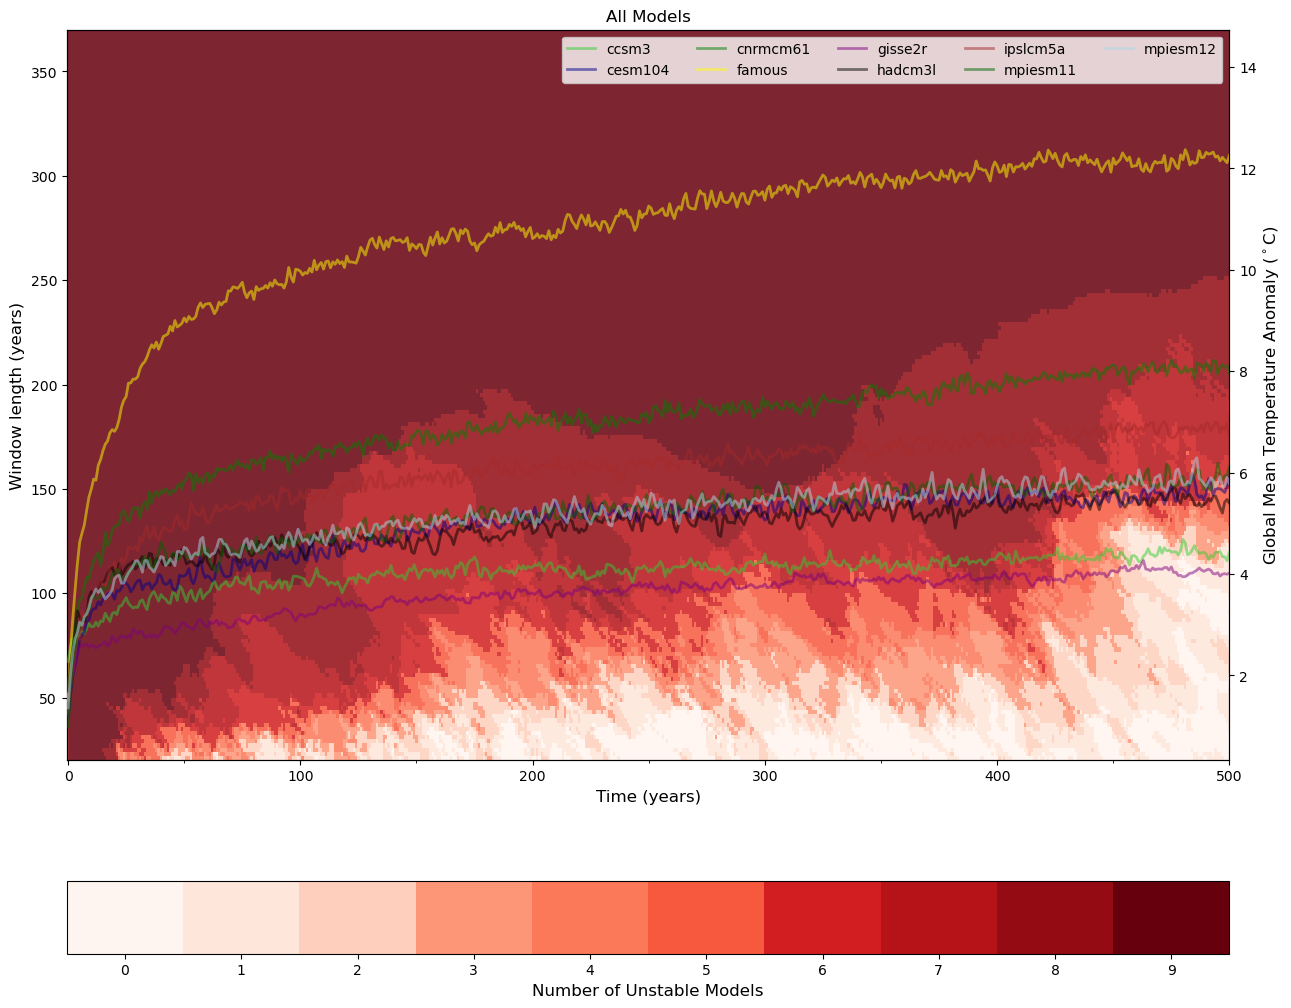

In [317]:
reload(sn_plot)
mpl.rcParams.update(mpl.rcParamsDefault)
fig, ax1, ax2, ax3,cbar = sn_plot.sn_multi_window_in_time(
    unstable_number_da, stable_number_da, abrupt4x_mean, 
    logginglevel='DEBUG', 
    hieght = 15, width = 12,
    vmin=0, vmax=10, step=1, cbartick_offset = 0.5,
    cmap='Reds',
    extend='neither', xupperlim = 500,
    cbar_label= 'Number of Unstable Models', 
    title = f'All Models', cbar_ncols = 5, filter_max=True)

fig.savefig(f'{IMG_DIR}/04_all_model_SN_multi_window_long_models_number_unstable', dpi=200, bbox_inches='tight')

# Model Subset
We only want a subset of the models that go for a certain legnth of time

In [ ]:
# The lenfth of the dataset needed
DESIRED_LENGTH = 1500

In [ ]:
model_metadata

In [ ]:
# model_subset = ['famous', 'gisse2r', 'mpiesm11', 'cesm104']
model_subset = [
    key for key, value in model_metadata.items() if value['length (years)'] > DESIRED_LENGTH and key != 'mean'] 
model_subset

In [ ]:
# THe longest and shortest model in the selection
max_length = np.max([v['length (years)'] for key, v in model_metadata.items() if key in model_subset])
min_length = np.min([v['length (years)'] for key, v in model_metadata.items() if key in model_subset])
print(f'The shortest models is {min_length} and the longest model is {max_length} years')

In [ ]:
len(model_subset)

In [ ]:
# Counting the number of models present at each time step.
reload(sn)
number_model_subset= sn.count_over_data_vars(abrupt4x_mean, model_subset, dim='model')
number_model_subset

In [ ]:
# Gettting the number of models that are stable at each point
reload(sn)
unstable_number_model_subset = sn.number_finite(unstable_sn_ds[model_subset])
stable_number_model_subset = sn.number_finite(stable_sn_ds[model_subset])
unstable_number_model_subset

In [ ]:
no_red_colors = ('limegreen', 'darkblue', 'green', 'yellow', 'purple', 'black', 'brown','darkgreen' , 'lightblue')

In [ ]:
for c in no_red_colors:
    abrupt4x_mean.ccsm3.plot(c=c)

In [ ]:
reload(sn_plot)
fig, ax1, ax2, ax3, cbar = sn_plot.sn_multi_window_in_time(
                                unstable_number_model_subset, stable_number_model_subset,
                                abrupt4x_mean[model_subset], 
                                vmin=0, vmax=7, step=1, 
                                cmap='Reds', extend='neither', xupperlim = 1500,
                                cbar_label= 'Number of Unstable Models', 
                                cbartick_offset = 0.5, filter_max = True, 
                                title = f'Models longer than {min_length} - {model_subset}')

ax1.set_ylim([20, 350])
save_name = f'{IMG_DIR}/04_{model_subset}_SN_multi_window_min_length_{min_length}.png'
print(F'- Saving {save_name}')
fig.savefig(save_name, dpi=400, bbox_inches='tight')

In [ ]:
adjsut_model_y_text = {'ccsm3': 0.3, 'cesm104': -0.7, 'cnrmcm61':0.4,
                       'famous':0.3, 'gisse2r':-0.9, 'mpiesm11': 0.3}

In [ ]:
data = abrupt4x_mean[model_subset].isel(time=slice(None, min_length))

fig, ax = plt.subplots(figsize=(15,8))


# time = data['time'].values
for var in list(data.data_vars):
    
    # Removing nans from data
    da = data[var].dropna(dim='time')
    time = da.time.values
    values = da.values

    line_kwargs = dict(alpha = 0.6,linewidth = 1)
    
    
    ax.plot(time, values, label=var, **line_kwargs)
    c = plt.gca().lines[-1].get_color()
    
    
#     ax.annotate(var, xy = (time[-140], values[-1]+adjsut_model_y_text[var]), color=c, zorder=1000, size=12)

ax.set_ylabel('Temperature Anomaly (K)')
ax.set_xlabel('Year')
ax.set_title('GMST')
ax.set_ylim([0,15])
ax.set_xlim(data.time.values[0], data.time.values[-1])

leg = ax.legend(ncol=6, fontsize = 12)
[line.set_linewidth(3) for line in leg.get_lines()]
# fig.savefig(os.path.join(IMG_DIR, f'04_all_models_longer_than_{min_length}_x_lim_{min_length}_legend.png'))

# echam5mpiom failing at window length 101
The explanation of this is the control run only has 100 years and will thus break for window lengths longer than the control run length

In [ ]:
print(sn.global_mean_sn.__doc__)

In [ ]:
reload(sn)
model = 'echam5mpiom'
da_sn_echam5mpiom, da_sn_stable_echam5mpiom, da_sn_increasing_echam5mpiom, da_sn_decreasing_echam5mpiom\
            = sn.global_mean_sn(
                                abrupt4x_mean[model].dropna(dim='time'), 
                                control_ds_mean[model].dropna(dim='time'), 
                                window=99, logginglevel='DEBUG')

In [ ]:
reload(sn)
model = 'echam5mpiom'
da_sn_echam5mpiom, da_sn_stable_echam5mpiom, da_sn_increasing_echam5mpiom, da_sn_decreasing_echam5mpiom\
            = sn.global_mean_sn(
                                abrupt4x_mean[model].dropna(dim='time'), 
                                control_ds_mean[model].dropna(dim='time'), 
                                window=101, logginglevel='DEBUG')